# Clustering NYC Neighborhoods to Determine Service Needs
Ryan Brenner

![](https://www1.nyc.gov/assets/planning/images/content/pages/data-maps/maps-geography/city-neighborhoods/mapview.jpg)

## *Introduction*
***
By far the most populous city in the US, New York’s five boroughs are divided into hundreds of neighborhoods. Understanding the uniqueness of each neighborhood allows service providers to deliver what each community needs and businesses to offer what each community demands. Personally gaining such an understanding, however, would require significant on-the-ground research. A more efficient approach is analyzing existing data to see if there is an overarching neighborhood typology. 

The Applied Data Science course from IBM on Coursera used Foursquare data to determine the top businesses in each neighborhood and used those findings to cluster neighborhoods into neighborhood typologies. Since clustering is a form of unsupervised machine learning, it is not possible to assess the model with the data used to create the model. However, it is possible to assess the model using other data to determine if clustering with one dataset is consistent with clustering using another dataset. This project looks at the clustering of New York City neighborhoods using Foursquare data and compares it to 311 service complaints from each neighborhood. This analysis will help determine whether the Foursquare cluster groups are correlated with the top service requests from each neighborhood. This information will help determine whether Foursquare data can be used by service providers to anticipate community requests.

## *Data*
***
Data used for this project comes from two sources: Foursquare and NYC 311. 

<img src="https://searchengineland.com/figz/wp-content/seloads/2014/07/foursquare-name-logo-ss-1920-600x337.jpg" style="width:350px">
  
The Foursquare data comes from Foursquare's API. This database provides a list of businesses near a given location and categorizes each business based on the service it provides. For this project, businesses from each neighborhood will be extracted and used to determine the top ten business types within each neighborhood. These types will then be used to cluster neighborhoods into typologies.   

<img src="https://nyintl.net/site/wp-content/uploads/2015/04/a-call-for-help-dial-311.jpg" style="width:350px"> 
  
The 311 Data comes from NYC's open data website. The dataset includes every 311 call with the subject of the call and the location where it was made. For this project, calls from each neighborhood will be extracted and used to determine the top ten requests made within each neighobrhood. Call requests will be used to cluster neighborhoods again to see how well the clustering based on Foursquare data matches the clustering based on 311 calls.  

## *Methodology*
***
> ***Foursquare Data***

**1. Import packages**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # library to convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # library to tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules for visualization
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # library for clustering analysis

#!conda install -c conda-forge folium=0.5.0 --yes #uncomment if install needed
import folium # map rendering library

**2. Download and extract data**

In [2]:
!wget -q -O 'newyork_data.json' https://ibm.box.com/shared/static/fbpwbovar7lf8p5sgddm06cgipa2rxpe.json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']

**3. Create a dataframe**

In [3]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
neighborhoods = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

**4. Get Latitude/Longitdue of NYC**

In [4]:
address = 'New York City, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

**5. Access Foursquare API**

In [5]:
# The code was removed by Watson Studio for sharing.

Client_ID and Client_Secret for Foursquare API


**6. Get the venues in each neighborhood**

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [8]:
nyc_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],latitudes=neighborhoods['Latitude'],longitudes=neighborhoods['Longitude'])

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

**7. Count the venue categories in each neighborhood**

In [9]:
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.drop('Neighborhood',axis=1,inplace=True)

column_list = list(nyc_onehot.columns)

# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = ['Neighborhood'] + column_list
nyc_onehot = nyc_onehot[fixed_columns]

In [10]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()

In [11]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [12]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

**8. Cluster by top venues**

In [13]:
# set number of clusters
kclusters = 5

nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(nyc_grouped_clustering)

In [14]:
# add clustering labels
neighborhoods_venues_sorted['Foursquare Cluster'] = kmeans.labels_
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')

> ***NYC 311***

**1. Import additional packages**

In [16]:
#library to access NYC open data API
#!pip install sodapy #uncomment to install if needed
from sodapy import Socrata 

#libraries for additional geospatial analysis
#!conda install -c conda-forge geopandas --yes #uncomment to install if needed
#!conda install -c conda-forge gdal
import fiona; print(fiona.__version__)
import geopandas as gpd
from geopandas import GeoDataFrame

#!pip install pysal #uncomment to install if needed
import pysal as ps

#!pip install shapely #uncomment to install if needed
from shapely.geometry import Point, LineString, Polygon

#!pip install rtree #uncomment to install if needed

1.7.0.post2


**2. Download data**

In [17]:
nyc311 = pd.read_json('https://data.cityofnewyork.us/resource/fhrw-4uyv.json?$where=created_date%3E%272017-09-03%27')

**3. Geolocate calls**

In [18]:
geo_nyc311 = nyc311[['complaint_type','latitude','longitude']]
geo_nyc311.dropna(how='any',inplace=True)
geometry = [Point(xy) for xy in zip(geo_nyc311.longitude, geo_nyc311.latitude)]
crs = {'init': 'epsg:4326'}
geo_call = GeoDataFrame(geo_nyc311, crs=crs, geometry=geometry)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


**4. Count calls in each neighborhood**

In [19]:
nta = gpd.read_file('http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nynta/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')
nta = nta.to_crs({'init': 'epsg:4326'})

In [20]:
match = gpd.sjoin(geo_call, nta, how='inner', op='intersects')

In [21]:
neighborhood_calls = match.groupby(['NTAName','complaint_type']).count()

In [22]:
melted_calls = neighborhood_calls.reset_index()
pre_pivot = melted_calls[['NTAName','complaint_type','geometry']]

In [23]:
pivoted_calls = pre_pivot.pivot_table(values='geometry',index='NTAName',columns='complaint_type',aggfunc=np.sum)
pivoted_calls.fillna(0,inplace=True)
pivoted_calls.reset_index(inplace=True)

In [24]:
num_top_venues = 3

columns = ['NTAName','First','Second','Third']

calls_sorted = pd.DataFrame(columns=columns)
calls_sorted['NTAName'] = pivoted_calls['NTAName']

for ind in np.arange(pivoted_calls.shape[0]):
    calls_sorted.iloc[ind, 1:] = return_most_common_venues(pivoted_calls.iloc[ind, :], num_top_venues)

**5. Cluster by top requests**

In [25]:
# set number of clusters
kclusters = 5

calls_clustering = pivoted_calls.drop('NTAName', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(calls_clustering)

In [26]:
# add clustering labels
calls_sorted['311 Cluster'] = kmeans.labels_
nta['311 Cluster'] = calls_sorted['311 Cluster']

> ***Merge the Two***

*Because the neighborhood names were represented differently in each dataset, I needed to download the dataframes and manually join them using excel*

In [27]:
merged_clusters = pd.DataFrame(data={'neighborhood':['Allerton','Annadale','Arlington','Arverne','Astoria','Auburndale','Bath Beach','Battery Park City','Bay Ridge','Bay Terrace','Baychester','Bayside','Bayswater','Bedford Park','Bedford Stuyvesant','Bellerose','Bloomfield','Boerum Hill','Borough Park','Breezy Point','Briarwood','Brighton Beach','Broad Channel','Bronxdale','Brooklyn Heights','Brookville','Brownsville','Bushwick','Carnegie Hill','Carroll Gardens','Castle Hill','Central Harlem','Chelsea','Chinatown','City Island','City Line','Civic Center','Clason Point','Clifton','Clinton','Clinton Hill','Cobble Hill','Concourse','Concourse Village','Corona','Country Club','Crown Heights','Cypress Hills','Dongan Hills','Douglaston','Downtown','Dumbo','East Elmhurst','East Harlem','East New York','East Tremont','East Village','East Williamsburg','Eastchester','Edenwald','Edgemere','Edgewater Park','Elmhurst','Eltingville','Erasmus','Far Rockaway','Fieldston','Flatbush','Flatiron','Flatlands','Floral Park','Flushing','Fordham','Forest Hills','Fort Greene','Fox Hills','Gerritsen Beach','Glen Oaks','Glendale','Gowanus','Gramercy','Graniteville','Gravesend','Greenpoint','Grymes Hill','Hamilton Heights','Hammels','Hillcrest','Hollis','Holliswood','Homecrest','Howard Beach','Hudson Yards','Huguenot','Hunters Point','Hunts Point','Inwood','Jackson Heights','Jamaica Estates','Jamaica Hills','Kensington','Kew Gardens','Kew Gardens Hills','Kingsbridge','Kingsbridge Heights','Laurelton','Lenox Hill','Lincoln Square','Lindenwood','Little Italy','Little Neck','Long Island City','Longwood','Lower East Side','Madison','Manhattan Beach','Manhattanville','Marble Hill','Mariners Harbor','Maspeth','Melrose','Middle Village','Midland Beach','Midtown','Midtown South','Midwood','Morningside Heights','Morris Heights','Morris Park','Mott Haven','Mount Hope','Murray Hill','New Dorp','New Springville','North Corona','North Riverdale','Norwood','Oakland Gardens','Oakwood','Ocean Hill','Ocean Parkway','Old Town','Olinville','Park Slope','Parkchester','Pelham Bay','Pelham Gardens','Pelham Parkway','Pomonok','Port Morris','Princes Bay','Prospect Lefferts Gardens','Queens Village','Queensboro Hill','Queensbridge','Ravenswood','Red Hook','Rego Park','Remsen Village','Richmond Hill','Ridgewood','Riverdale','Rockaway Park','Roosevelt Island','Rosebank','Rosedale','Rossville','Rugby','Schuylerville','Sheepshead Bay','Soho','Soundview','South Beach','South Jamaica','South Ozone Park','Springfield Gardens','Spuyten Duyvil','St. Albans','Stapleton','Starrett City','Steinway','Stuyvesant Town','Sunnyside','Sunset Park','Throgs Neck','Travis','Tribeca','Turtle Bay','Unionport','University Heights','Upper East Side','Upper West Side','Van Nest','Vinegar Hill','Washington Heights','West Farms','West Village','Westchester Square','Williamsbridge','Williamsburg','Windsor Terrace','Wingate','Woodhaven','Woodrow','Woodside','Yorkville'],
                                     'foursquare cluster':['B','B','D','B','A','A','B','A','A','A','B','A','C','B','A','A','D','A','B','A','E','A','E','A','A','E','B','A','A','A','B','A','A','A','A','B','A','C','B','A','A','A','B','B','B','A','B','B','B','A','A','A','B','A','E','B','A','A','B','E','B','E','A','B','B','B','A','B','A','B','B','A','B','B','A','D','A','B','E','A','A','D','B','A','D','A','D','A','A','B','B','A','A','B','A','B','A','A','B','B','B','B','B','B','B','B','A','A','E','A','A','A','2','A','2','D','A','B','D','B','B','A','D','A','A','B','A','B','B','B','B','A','A','B','E','B','B','B','D','B','A','A','E','A','B','A','B','A','B','A','B','B','B','B','A','A','A','B','B','B','A','B','B','A','B','B','B','B','B','A','A','B','E','B','E','B','B','B','B','B','A','A','A','B','E','E','A','A','B','B','A','A','E','A','A','B','A','B','B','A','A','B','B','B','A','A'],
                                     '311 cluster':['2','2','2','2','3','2','2','2','2','2','2','2','2','2','0','2','2','2','0','2','2','0','2','2','2','2','2','2','2','0','2','2','4','4','2','2','4','2','2','2','2','2','0','2','2','2','2','2','2','2','2','2','2','2','2','2','1','2','2','2','2','2','0','2','2','2','2','0','4','2','2','2','2','0','2','2','2','2','0','2','2','2','2','2','2','0','2','2','0','2','0','2','4','2','3','0','0','0','2','2','0','2','2','2','2','2','4','2','2','4','2','0','2','2','0','2','0','0','2','0','2','2','2','4','4','0','0','2','2','2','2','2','2','2','2','2','2','2','2','2','0','2','2','2','2','2','2','2','2','2','2','2','0','2','0','0','0','2','2','0','2','2','2','4','2','2','2','2','2','2','4','2','2','0','0','0','2','0','2','2','0','2','3','0','2','2','4','4','2','2','2','0','2','2','2','2','4','2','2','2','2','2','0','2','0','2',]})
merged_clusters

,311 cluster,foursquare cluster,neighborhood
0,2,B,Allerton
1,2,B,Annadale
2,2,D,Arlington
3,2,B,Arverne
4,3,A,Astoria
5,2,A,Auburndale
6,2,B,Bath Beach
7,2,A,Battery Park City
8,2,A,Bay Ridge
9,2,A,Bay Terrace


| . |A=0|A=1|A=2|A=3|A=4| 
|---|---|---|---|---|---|
|Matches|18|1|52|3|14| 

|. |B=0|B=1|B=2|B=3|B=4|
|---|---|---|---|---|---|
|Matches|17|0|72|0|0|

|. |C=0|C=1|C=2|C=3|C=4|
|---|---|---|---|---|---|
|Matches|0|0|2|0|0|

|. |D=0|D=1|D=2|D=3|D=4|
|---|---|---|---|---|---|
|Matches|0|0|10|0|0|

|. |E=0|E=1|E=2|E=3|E=4|
|---|---|---|---|---|---|
|Matches|3|0|14|0|0|

## *Results*
***

**Foursquare Clusters**

In [30]:
# create map
foursquare_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Foursquare Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(foursquare_clusters)
       
foursquare_clusters

**311 Clusters**

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


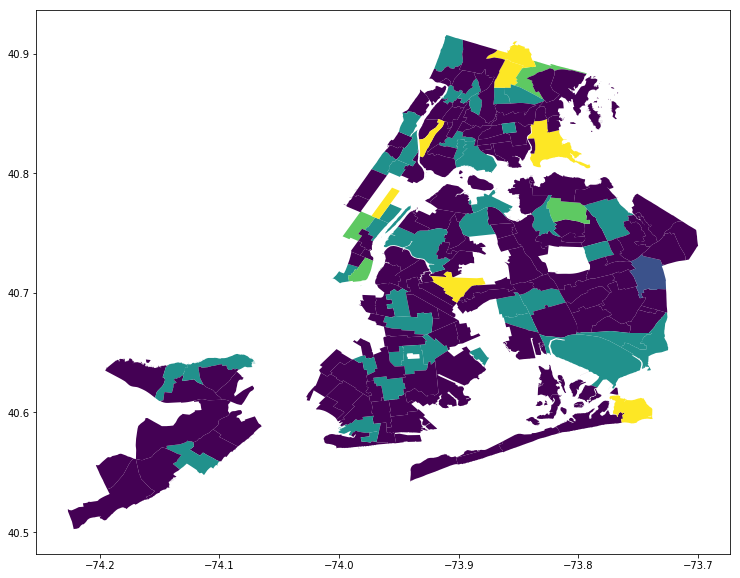

In [76]:
graph_data = nta.dropna(axis=0,how='any')
graph_data['label'] = graph_data['311 Cluster'].astype(int)
graph_data.plot(column='label',figsize = (16, 10),scheme='equal_interval')

**Matches**

| . |A=0|A=1|A=2|A=3|A=4| 
|---|---|---|---|---|---|
|Matches|18|1|52|3|14| 

|. |B=0|B=1|B=2|B=3|B=4|
|---|---|---|---|---|---|
|Matches|17|0|72|0|0|

|. |C=0|C=1|C=2|C=3|C=4|
|---|---|---|---|---|---|
|Matches|0|0|2|0|0|

|. |D=0|D=1|D=2|D=3|D=4|
|---|---|---|---|---|---|
|Matches|0|0|10|0|0|

|. |E=0|E=1|E=2|E=3|E=4|
|---|---|---|---|---|---|
|Matches|3|0|14|0|0|

Based on the table above, the best match is when Foursquare group A is 311 group 0 and Foursquare group B is 311 group 2 (Foursquare groups C, D, and E do not then match any 311 groups)

## *Discussion*
***

Both Foursquare data and 311 request data can be used to cluster neighborhoods into typologies. Under the optimized comparison of Foursquare groups A and B matching with 311 groups 0 and 2 respectively, the Foursquare clustering is able to correctly predict 90 of the 311 neighborhood clusters. Out of 206 entries, this is an accuracy of about 43.69%. Randomly placing each neighborhood into five categories would be expected to result in a 20% accuracy, so though the accuracy of the Foursquare data is low, it is better than random.

## *Conclusion*
***
Clustering NYC neighborhoods using Foursquare data could be used to predict clusters based on 311 service requests. This means that there is some relationship between the typology based on businesses and the typology based on request categories. Knowing this relationships exists allows service providers to predict what each neighborhood typology will likely request. However, the accuracy of the Foursquare clustering at predicting 311 clustering is low (~44%). While this is better than random guessing, there are likely better predictors of 311 clusters. 